## Banking Case Study

In [1]:
import pandas as pd 
import numpy as np

In [2]:
bank = pd.read_excel(r"C:\Users\Harshita Sahu\OneDrive\Documents\Banking_Case_Study.xlsx")

In [3]:
bank

,ID,FICO,Business_Revenue,TSR,Last_6M_Avg_Util,Income,Last_6M_Avg_Remit,Last_6M_Avg_Bal,Internal_Revolve,Lending_AR_pct_in_last_6M,...,Months_in_Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.000000,1,1.000000,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.000000,1,10.000000,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941176,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33995,33996,996.470588,0.833333,NaN,611.574748,9.090909,2.040273,199.590730,1.907932,NaN,...,250.208507,13.333333,1,13.333333,1.913514,NaN,1,1,155.080895,Low
33996,33997,885.882353,NaN,NaN,617.448254,22.727273,0.943654,197.743580,4.902443,58.632548,...,5.004170,NaN,1,NaN,1.014169,NaN,0,0,162.972461,Medium
33997,33998,976.470588,0.166667,35.714286,621.613105,18.181818,0.968569,197.437342,NaN,58.632548,...,130.108424,2.000000,1,12.666667,1.228365,367.02,0,0,108.767642,Low
33998,33999,785.882353,0.177233,1000.000000,682.762351,NaN,0.623798,198.254389,9.359987,58.632548,...,18.348624,11.866667,1,11.866667,0.976599,1000.00,0,0,101.471601,Low


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         34000 non-null  int64  
 1   FICO                       33039 non-null  float64
 2   Business_Revenue           30615 non-null  float64
 3   TSR                        21506 non-null  float64
 4   Last_6M_Avg_Util           33999 non-null  float64
 5   Income                     30505 non-null  float64
 6   Last_6M_Avg_Remit          33165 non-null  float64
 7   Last_6M_Avg_Bal            33165 non-null  float64
 8   Internal_Revolve           18183 non-null  float64
 9   Lending_AR_pct_in_last_6M  29450 non-null  float64
 10  ExternalBalance            26435 non-null  float64
 11  Months_in_Business         23498 non-null  float64
 12  preferred_spend_line       25478 non-null  float64
 13  total_cards                34000 non-null  obj

## Missings

In [5]:
bank.isnull().sum()/bank.isnull().value_counts().sum()

ID                           0.000000
FICO                         0.028265
Business_Revenue             0.099559
TSR                          0.367471
Last_6M_Avg_Util             0.000029
Income                       0.102794
Last_6M_Avg_Remit            0.024559
Last_6M_Avg_Bal              0.024559
Internal_Revolve             0.465206
Lending_AR_pct_in_last_6M    0.133824
ExternalBalance              0.222500
Months_in_Business           0.308882
preferred_spend_line         0.250647
total_cards                  0.000000
preferred_bal_line           0.236000
preavgremit1_3_all           0.025471
External_rev_rate            0.652765
Supplementary_Cards          0.000000
isChargeCust                 0.000000
CMV                          0.000000
Assigned_Line                0.000000
dtype: float64

In [6]:
bank_X = bank.columns.difference(['ID','Internal_Revolve','Assigned_Line','External_rev_rate','TSR','Months_in_Business','preferred_spend_line','total_cards'])
bank_X = bank[bank_X]
bank_X

,Business_Revenue,CMV,ExternalBalance,FICO,Income,Last_6M_Avg_Bal,Last_6M_Avg_Remit,Last_6M_Avg_Util,Lending_AR_pct_in_last_6M,Supplementary_Cards,isChargeCust,preavgremit1_3_all,preferred_bal_line
0,0.138889,100.104991,0.279273,828.235294,1.818182,198.113469,1.081550,625.911006,58.632548,1,0,1.540594,1.000000
1,0.027778,146.654045,NaN,911.764706,8.181818,198.600020,1.344479,611.574748,NaN,0,1,1.614613,NaN
2,0.833333,98.249570,0.453212,962.352941,8.181818,197.267767,0.720796,615.825381,58.632548,0,0,1.044599,10.000000
3,NaN,140.862306,NaN,892.941176,9.090909,197.355744,0.820218,638.076431,58.632548,1,0,1.145729,NaN
4,0.083333,101.268503,NaN,914.117647,5.181818,198.790477,1.372928,626.514988,58.632548,1,0,1.558341,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33995,0.833333,155.080895,1.837104,996.470588,9.090909,199.590730,2.040273,611.574748,NaN,1,1,1.913514,13.333333
33996,NaN,162.972461,NaN,885.882353,22.727273,197.743580,0.943654,617.448254,58.632548,0,0,1.014169,NaN
33997,0.166667,108.767642,1.172531,976.470588,18.181818,197.437342,0.968569,621.613105,58.632548,0,0,1.228365,12.666667
33998,0.177233,101.471601,8.072586,785.882353,NaN,198.254389,0.623798,682.762351,58.632548,0,0,0.976599,11.866667


In [7]:
bank_X.isnull().sum()/bank_X.isnull().value_counts().sum()

Business_Revenue             0.099559
CMV                          0.000000
ExternalBalance              0.222500
FICO                         0.028265
Income                       0.102794
Last_6M_Avg_Bal              0.024559
Last_6M_Avg_Remit            0.024559
Last_6M_Avg_Util             0.000029
Lending_AR_pct_in_last_6M    0.133824
Supplementary_Cards          0.000000
isChargeCust                 0.000000
preavgremit1_3_all           0.025471
preferred_bal_line           0.236000
dtype: float64

In [8]:
bank_Y = bank['Assigned_Line']

In [9]:
bank_Y.value_counts()

Assigned_Line
Medium    18172
Low       12081
High       3747
Name: count, dtype: int64

In [10]:
bank_X.nunique()

Business_Revenue              2206
CMV                          24591
ExternalBalance              12497
FICO                           220
Income                         702
Last_6M_Avg_Bal              30170
Last_6M_Avg_Remit            29186
Last_6M_Avg_Util             17379
Lending_AR_pct_in_last_6M     3691
Supplementary_Cards             14
isChargeCust                     2
preavgremit1_3_all           27548
preferred_bal_line            1691
dtype: int64

In [11]:
numeric_clo = [col for col in bank_X if bank_X[col].dtype in ['float64','int64'] and bank_X[col].nunique()>14]
cat_X_col = [col for col in bank_X if bank_X[col].dtype in ['float64','int64'] and bank_X[col].nunique()<= 14]

In [12]:
numeric_X = bank_X[numeric_clo]

In [13]:
cat_X = bank_X[cat_X_col]

In [14]:
numeric_X

,Business_Revenue,CMV,ExternalBalance,FICO,Income,Last_6M_Avg_Bal,Last_6M_Avg_Remit,Last_6M_Avg_Util,Lending_AR_pct_in_last_6M,preavgremit1_3_all,preferred_bal_line
0,0.138889,100.104991,0.279273,828.235294,1.818182,198.113469,1.081550,625.911006,58.632548,1.540594,1.000000
1,0.027778,146.654045,NaN,911.764706,8.181818,198.600020,1.344479,611.574748,NaN,1.614613,NaN
2,0.833333,98.249570,0.453212,962.352941,8.181818,197.267767,0.720796,615.825381,58.632548,1.044599,10.000000
3,NaN,140.862306,NaN,892.941176,9.090909,197.355744,0.820218,638.076431,58.632548,1.145729,NaN
4,0.083333,101.268503,NaN,914.117647,5.181818,198.790477,1.372928,626.514988,58.632548,1.558341,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33995,0.833333,155.080895,1.837104,996.470588,9.090909,199.590730,2.040273,611.574748,NaN,1.913514,13.333333
33996,NaN,162.972461,NaN,885.882353,22.727273,197.743580,0.943654,617.448254,58.632548,1.014169,NaN
33997,0.166667,108.767642,1.172531,976.470588,18.181818,197.437342,0.968569,621.613105,58.632548,1.228365,12.666667
33998,0.177233,101.471601,8.072586,785.882353,NaN,198.254389,0.623798,682.762351,58.632548,0.976599,11.866667


In [15]:
cat_X

,Supplementary_Cards,isChargeCust
0,1,0
1,0,1
2,0,0
3,1,0
4,1,0
...,...,...
33995,1,1
33996,0,0
33997,0,0
33998,0,0


for i in bank_X.columns:
    bank_X[i] = bank_X[i].fillna(bank_X[i].mean())
    bank_X

## KNN IMPUTER

In [16]:
from sklearn.impute import KNNImputer,SimpleImputer
impute = KNNImputer(missing_values=np.nan,n_neighbors = 5)
numeric_bank_X = pd.DataFrame(impute.fit_transform(numeric_X),columns = numeric_X.columns)

simple_impute = SimpleImputer(strategy = 'most_frequent')
simple_impute_X = pd.DataFrame(simple_impute.fit_transform(cat_X),columns = cat_X.columns)


## Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_scaled = st.fit_transform(numeric_bank_X)

In [18]:
bank_X_cleaned = pd.concat([numeric_bank_X,simple_impute_X],axis = 1)

In [19]:
bank_X_cleaned.isnull().sum()/bank_X.isnull().value_counts().sum()

Business_Revenue             0.0
CMV                          0.0
ExternalBalance              0.0
FICO                         0.0
Income                       0.0
Last_6M_Avg_Bal              0.0
Last_6M_Avg_Remit            0.0
Last_6M_Avg_Util             0.0
Lending_AR_pct_in_last_6M    0.0
preavgremit1_3_all           0.0
preferred_bal_line           0.0
Supplementary_Cards          0.0
isChargeCust                 0.0
dtype: float64

In [20]:
bank_X_cleaned

,Business_Revenue,CMV,ExternalBalance,FICO,Income,Last_6M_Avg_Bal,Last_6M_Avg_Remit,Last_6M_Avg_Util,Lending_AR_pct_in_last_6M,preavgremit1_3_all,preferred_bal_line,Supplementary_Cards,isChargeCust
0,0.138889,100.104991,0.279273,828.235294,1.818182,198.113469,1.081550,625.911006,58.632548,1.540594,1.000000,1,0
1,0.027778,146.654045,8.583871,911.764706,8.181818,198.600020,1.344479,611.574748,56.510876,1.614613,12.880000,0,1
2,0.833333,98.249570,0.453212,962.352941,8.181818,197.267767,0.720796,615.825381,58.632548,1.044599,10.000000,0,0
3,0.151111,140.862306,3.750298,892.941176,9.090909,197.355744,0.820218,638.076431,58.632548,1.145729,8.600000,1,0
4,0.083333,101.268503,1.611884,914.117647,5.181818,198.790477,1.372928,626.514988,58.632548,1.558341,17.986667,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33995,0.833333,155.080895,1.837104,996.470588,9.090909,199.590730,2.040273,611.574748,51.719297,1.913514,13.333333,1,1
33996,0.137778,162.972461,6.519190,885.882353,22.727273,197.743580,0.943654,617.448254,58.632548,1.014169,15.800000,0,0
33997,0.166667,108.767642,1.172531,976.470588,18.181818,197.437342,0.968569,621.613105,58.632548,1.228365,12.666667,0,0
33998,0.177233,101.471601,8.072586,785.882353,11.636382,198.254389,0.623798,682.762351,58.632548,0.976599,11.866667,0,0


## ENCODING

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
bank_Y = pd.Series(label.fit_transform(bank_Y))

In [22]:
bank_Y

0        1
1        0
2        2
3        1
4        0
        ..
33995    1
33996    2
33997    1
33998    1
33999    0
Length: 34000, dtype: int32

## Outlier 

In [23]:
def outlier_removal(numeric_X):
    for i in numeric_X.columns:
        if ((numeric_X[i].dtype == 'int64') or (numeric_X[i].dtype == 'float64')):
            numeric_X[i] = numeric_X[i].clip(lower = numeric_X[i].quantile(0.25),upper = numeric_X[i].quantile(0.75))
    return numeric_X

In [24]:
numeric_X = outlier_removal(numeric_X)

C:\Users\Harshita Sahu\AppData\Local\Temp\ipykernel_12648\557678511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_X[i] = numeric_X[i].clip(lower = numeric_X[i].quantile(0.25),upper = numeric_X[i].quantile(0.75))
C:\Users\Harshita Sahu\AppData\Local\Temp\ipykernel_12648\557678511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_X[i] = numeric_X[i].clip(lower = numeric_X[i].quantile(0.25),upper = numeric_X[i].quantile(0.75))
C:\Users\Harshita Sahu\AppData\Local\Temp\ipykernel_12648\55

In [25]:
numeric_X.describe(include = 'all' , percentiles = [0.25,0.50,0.75,0.99,0.99999])

,Business_Revenue,CMV,ExternalBalance,FICO,Income,Last_6M_Avg_Bal,Last_6M_Avg_Remit,Last_6M_Avg_Util,Lending_AR_pct_in_last_6M,preavgremit1_3_all,preferred_bal_line
count,30615.000000,34000.000000,26435.000000,33039.000000,30505.000000,33165.000000,33165.000000,33999.000000,29450.000000,33134.000000,25976.000000
mean,0.271449,126.764338,2.913288,921.107034,11.501895,198.256846,1.138537,622.914576,58.324585,1.375219,11.073760
std,0.196150,22.655252,2.218379,30.263933,4.647408,1.020813,0.427540,10.583688,0.509771,0.323012,3.975916
min,0.083333,104.385542,0.638239,882.352941,6.636364,197.196716,0.691201,611.691167,57.458373,1.040125,6.666667
25%,0.083333,104.385542,0.638239,882.352941,6.636364,197.196716,0.691201,611.691605,57.458373,1.040137,6.666667
50%,0.166667,117.493115,2.098360,924.705882,10.000000,197.912501,0.998093,619.802909,58.632548,1.262747,10.000000
75%,0.555556,159.445891,6.043005,956.470588,18.181818,199.687427,1.735250,637.448377,58.632548,1.827480,16.400000
99%,0.555556,159.446213,6.043179,956.470588,18.181818,199.687427,1.735250,637.450565,58.632548,1.827486,16.400000
100%,0.555556,159.446213,6.043179,956.470588,18.181818,199.687427,1.735250,637.450565,58.632548,1.827486,16.400000
max,0.555556,159.446213,6.043179,956.470588,18.181818,199.687427,1.735250,637.450565,58.632548,1.827486,16.400000


In [26]:
bank_Y

0        1
1        0
2        2
3        1
4        0
        ..
33995    1
33996    2
33997    1
33998    1
33999    0
Length: 34000, dtype: int32

## Vif

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.DataFrame()
df['Features'] = bank_X_cleaned.columns 
df['vif'] = [variance_inflation_factor(bank_X_cleaned.values,i) for i in range(len(bank_X_cleaned.columns))]

In [28]:
df

,Features,vif
0,Business_Revenue,1.009615
1,CMV,2.970149
2,ExternalBalance,2.334533
3,FICO,285.149874
4,Income,1.358838
5,Last_6M_Avg_Bal,636.348744
6,Last_6M_Avg_Remit,12.702910
7,Last_6M_Avg_Util,447.208485
8,Lending_AR_pct_in_last_6M,82.718578
9,preavgremit1_3_all,9.622381


In [29]:
bank_X_cleaned = bank_X_cleaned.drop(columns = ['Last_6M_Avg_Bal','Last_6M_Avg_Util','Lending_AR_pct_in_last_6M'])

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.DataFrame()
df['Features'] = bank_X_cleaned.columns
df['vif'] = [variance_inflation_factor(bank_X_cleaned.values,i) for i in range(len(bank_X_cleaned.columns))]

In [31]:
df

,Features,vif
0,Business_Revenue,1.009506
1,CMV,2.782967
2,ExternalBalance,2.134153
3,FICO,4.546792
4,Income,1.334104
5,Last_6M_Avg_Remit,7.317357
6,preavgremit1_3_all,7.345146
7,preferred_bal_line,3.968183
8,Supplementary_Cards,1.363274
9,isChargeCust,1.463731


<Axes: >

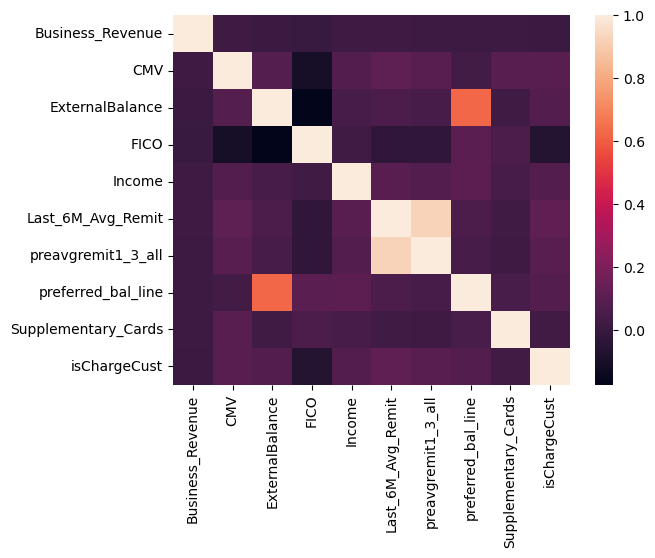

In [32]:
import seaborn as sns 
sns.heatmap(bank_X_cleaned.corr())

In [33]:
bank_X_cleaned.describe(include = 'all' , percentiles = [0.25,0.50,0.75,0.99,0.99999])

,Business_Revenue,CMV,ExternalBalance,FICO,Income,Last_6M_Avg_Remit,preavgremit1_3_all,preferred_bal_line,Supplementary_Cards,isChargeCust
count,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
mean,1.101967,161.355950,5.271275,917.277260,15.077014,2.044424,2.082117,12.341366,0.400029,0.298059
std,12.189118,123.231136,10.288972,49.764931,27.830045,8.854496,7.951219,10.812870,0.684850,0.457412
min,0.001333,0.000000,0.000693,730.588235,0.005000,0.353228,0.959315,0.133333,0.000000,0.000000
25%,0.083333,104.385542,0.867618,882.352941,6.636364,0.693970,1.042569,6.853333,0.000000,0.000000
50%,0.166667,117.493115,2.528010,924.705882,10.454545,1.000830,1.265627,10.640000,0.000000,0.000000
75%,0.555556,159.446213,6.067780,956.470588,18.181818,1.734090,1.826610,15.333333,1.000000,1.000000
99%,16.666667,756.626506,39.589212,1000.000000,90.909091,16.114978,12.813369,43.333333,3.000000,1.000000
100%,1000.000000,1000.000000,663.923994,1000.000000,909.090818,670.614991,802.963629,632.770850,13.320020,1.000000
max,1000.000000,1000.000000,824.334457,1000.000000,909.090818,681.582083,1000.000000,775.000000,14.000000,1.000000


## Interquartile_Metod 

for i in bank_X.columns:
    Q1 = bank_X[i].quantile(0.25)
    Q3 = bank_X[i].quantile(0.75)
    IQR = Q3 - Q1

    Lower_cutt_off = Q1-1.5*IQR
    Upper_cutt_off = Q3 + 1.5*IQR
    bank_X = bank_X[ (bank_X[i]>= Lower_cutt_off) & (bank_X[i]<= Upper_cutt_off)]

## Select K_Best

In [34]:
from sklearn.feature_selection import SelectKBest,f_classif
select_k = SelectKBest(score_func =  f_classif ,k = 10)
X_k_best = select_k.fit_transform(bank_X_cleaned , bank_Y)
bank_X_cleaned.columns[select_k.get_support()]

Index(['Business_Revenue', 'CMV', 'ExternalBalance', 'FICO', 'Income',
       'Last_6M_Avg_Remit', 'preavgremit1_3_all', 'preferred_bal_line',
       'Supplementary_Cards', 'isChargeCust'],
      dtype='object')

## Recursive_Feature_Selection

In [35]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(estimator = RandomForestClassifier(),n_features_to_select = 10)
rfe.fit_transform(bank_X_cleaned,bank_Y)

array([[1.38888889e-01, 1.00104991e+02, 2.79273086e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.77777780e-02, 1.46654045e+02, 8.58387063e+00, ...,
        1.28800000e+01, 0.00000000e+00, 1.00000000e+00],
       [8.33333333e-01, 9.82495697e+01, 4.53212403e-01, ...,
        1.00000000e+01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.66666667e-01, 1.08767642e+02, 1.17253117e+00, ...,
        1.26666667e+01, 0.00000000e+00, 0.00000000e+00],
       [1.77233333e-01, 1.01471601e+02, 8.07258606e+00, ...,
        1.18666667e+01, 0.00000000e+00, 0.00000000e+00],
       [1.38888889e-01, 5.25886403e+01, 2.93548584e+01, ...,
        1.00000000e+01, 1.00000000e+00, 0.00000000e+00]])

In [36]:
bank_X_cleaned.columns[rfe.support_]

Index(['Business_Revenue', 'CMV', 'ExternalBalance', 'FICO', 'Income',
       'Last_6M_Avg_Remit', 'preavgremit1_3_all', 'preferred_bal_line',
       'Supplementary_Cards', 'isChargeCust'],
      dtype='object')

In [37]:
select_col = list(set((list(bank_X_cleaned.columns[select_k.get_support()]) + list(bank_X_cleaned.columns[rfe.support_]))))

In [38]:
bank_X_cleaned = bank_X_cleaned[select_col]

In [39]:
bank_X_cleaned

,Business_Revenue,FICO,CMV,isChargeCust,Supplementary_Cards,preferred_bal_line,Income,Last_6M_Avg_Remit,ExternalBalance,preavgremit1_3_all
0,0.138889,828.235294,100.104991,0,1,1.000000,1.818182,1.081550,0.279273,1.540594
1,0.027778,911.764706,146.654045,1,0,12.880000,8.181818,1.344479,8.583871,1.614613
2,0.833333,962.352941,98.249570,0,0,10.000000,8.181818,0.720796,0.453212,1.044599
3,0.151111,892.941176,140.862306,0,1,8.600000,9.090909,0.820218,3.750298,1.145729
4,0.083333,914.117647,101.268503,0,1,17.986667,5.181818,1.372928,1.611884,1.558341
...,...,...,...,...,...,...,...,...,...,...
33995,0.833333,996.470588,155.080895,1,1,13.333333,9.090909,2.040273,1.837104,1.913514
33996,0.137778,885.882353,162.972461,0,0,15.800000,22.727273,0.943654,6.519190,1.014169
33997,0.166667,976.470588,108.767642,0,0,12.666667,18.181818,0.968569,1.172531,1.228365
33998,0.177233,785.882353,101.471601,0,0,11.866667,11.636382,0.623798,8.072586,0.976599


## Modelling

In [40]:
from sklearn.model_selection import train_test_split
train_X,test_X ,train_Y,test_Y = train_test_split(bank_X_cleaned,bank_Y,test_size = 0.2 , random_state = 42)

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 4)
resampled_X,resampled_Y = sm.fit_resample(train_X,train_Y)

In [42]:
resampled_X.value_counts().sum()

43557

In [43]:
np.unique(resampled_Y,return_counts = True)

(array([0, 1, 2]), array([14519, 14519, 14519], dtype=int64))

## Logistic Regression 

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 4)
lr.fit(resampled_X,resampled_Y)

C:\Users\Harshita Sahu\Downloads\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=4)

In [45]:
predict_lr_test = lr.predict(test_X)
predict_lr_train = lr.predict(train_X)

In [46]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_auc_score
print('accuracy_score_test :' , accuracy_score(test_Y,predict_lr_test))
print('accuracy_score_train :' , accuracy_score(train_Y,predict_lr_train))

accuracy_score_test : 0.40955882352941175
accuracy_score_train : 0.42150735294117647


In [47]:
print(confusion_matrix(test_Y,predict_lr_test))

[[ 197  336  226]
 [ 400 1267  721]
 [ 722 1610 1321]]


In [48]:
print(classification_report(test_Y,predict_lr_test))

              precision    recall  f1-score   support

           0       0.15      0.26      0.19       759
           1       0.39      0.53      0.45      2388
           2       0.58      0.36      0.45      3653

    accuracy                           0.41      6800
   macro avg       0.38      0.38      0.36      6800
weighted avg       0.47      0.41      0.42      6800



In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
import xgboost
print(xgboost.__version__)

3.0.2


#### FOR PARAMETERS TRYING ON SAMPLE OF A DATA 

In [51]:
index_resample = resampled_X.sample(frac= 0.5,random_state = 101).index
sample_df_X = resampled_X.loc[index_resample]
sample_df_Y = resampled_Y.loc[index_resample]

In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
paragrid = ({'n_estimators':[100,200],'max_depth':[3,5,10],'learning_rate':[0.01,0.05],'min_child_weight':[1,5,10],'subsample':[0.5,1],'colsample_bytree':[0.5,1]})
grid = GridSearchCV(XGBClassifier(tree_method = 'hist'),param_grid = paragrid,scoring='f1_macro',cv = 5)
grid.fit(sample_df_X,sample_df_Y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.01, 0.05], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200], 'subsample': [0.5, 1]},
             scoring='f1_macro')

In [53]:
print('best_score',grid.best_score_)
print('best_parameters',grid.best_params_)

best_score 0.6019543393597351
best_parameters {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.5}


In [54]:
from xgboost import XGBClassifier
grid_ = XGBClassifier(learning_rate = 0.05 , max_depth = 10 ,n_estimators = 200,tree_method = 'hist',colsample_bytree = 1,min_child_weight = 1 , subsample = 0.5)
grid.fit(resampled_X,resampled_Y)
##grid_.fit(resampled_X,resampled_Y,eval_set = [(test_X,test_Y)],eval_metric = 'mlogloss', early_stopping_rounds=10)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.01, 0.05], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200], 'subsample': [0.5, 1]},
             scoring='f1_macro')

In [55]:
xgb_predict_train = grid.predict(resampled_X)
xgb_predict_test = grid.predict(test_X)

In [56]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_auc_score
print('accuracy_score_test :' , accuracy_score(test_Y,xgb_predict_test ))
print('accuracy_score_train :' , accuracy_score(resampled_Y,xgb_predict_train))

accuracy_score_test : 0.5023529411764706
accuracy_score_train : 0.8819937093922906


In [57]:
print('classification_report :' , classification_report(test_Y,xgb_predict_test ))
print('classification_report :' , classification_report(resampled_Y,xgb_predict_train))

classification_report :               precision    recall  f1-score   support

           0       0.21      0.21      0.21       759
           1       0.46      0.46      0.46      2388
           2       0.59      0.59      0.59      3653

    accuracy                           0.50      6800
   macro avg       0.42      0.42      0.42      6800
weighted avg       0.50      0.50      0.50      6800

classification_report :               precision    recall  f1-score   support

           0       0.90      0.91      0.91     14519
           1       0.88      0.86      0.87     14519
           2       0.87      0.88      0.87     14519

    accuracy                           0.88     43557
   macro avg       0.88      0.88      0.88     43557
weighted avg       0.88      0.88      0.88     43557

